This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(50, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [7]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 58ms/step - loss: 0.1761 - accuracy: 0.7497 - val_loss: 0.1179 - val_accuracy: 0.8613
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0979 - accuracy: 0.8823 - val_loss: 0.0983 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0764 - accuracy: 0.9025 - val_loss: 0.0876 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0624 - accuracy: 0.9239 - val_loss: 0.0875 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0544 - accuracy: 0.9343 - val_loss: 0.0883 - val_accuracy: 0.8796
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0470 - accuracy: 0.9426 - val_loss: 0.1057 - val_accuracy: 0.8585
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0410 - accuracy: 0.9517 - val_loss: 0.0855 - val_accuracy: 0.8815
Epoch 8/20
30

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

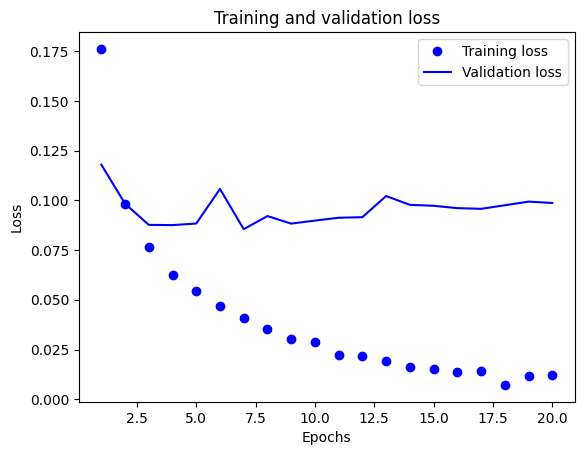

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

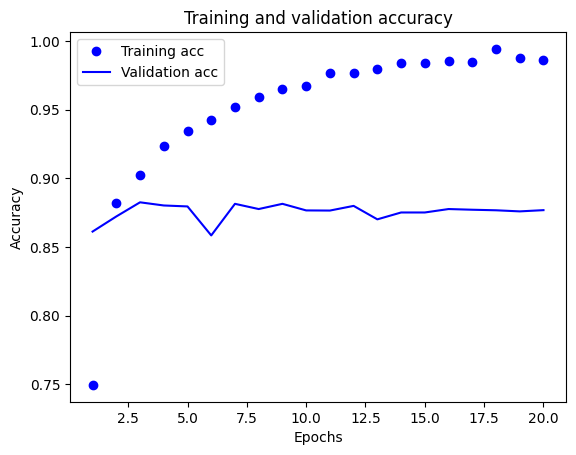

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [13]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 14ms/step - loss: 0.4965 - accuracy: 0.8049
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.2933 - accuracy: 0.8971
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.2769 - accuracy: 0.8913


In [14]:
results

[0.2769499719142914, 0.8912799954414368]

exercise

In [21]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
# compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
# training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5032 - accuracy: 0.7870 - val_loss: 0.4377 - val_accuracy: 0.8162
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3208 - accuracy: 0.8993 - val_loss: 0.3232 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2508 - accuracy: 0.9204 - val_loss: 0.2905 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2095 - accuracy: 0.9344 - val_loss: 0.2908 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1832 - accuracy: 0.9416 - val_loss: 0.2772 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1626 - accuracy: 0.9483 - val_loss: 0.2817 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1450 - accuracy: 0.9569 - val_loss: 0.2919 - val_accuracy: 0.8789
Epoch 8/20
30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

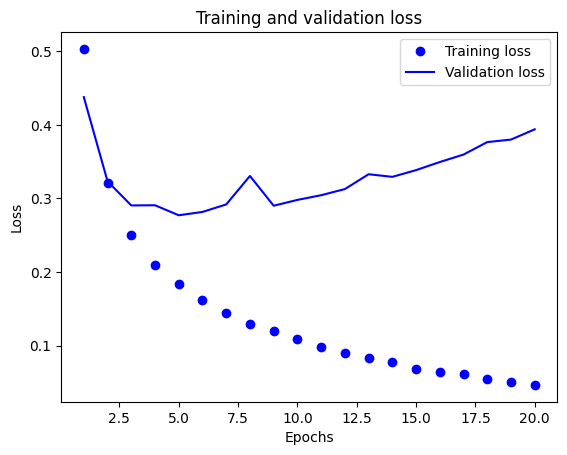

In [26]:
# Plotting the training and validation accuracy
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

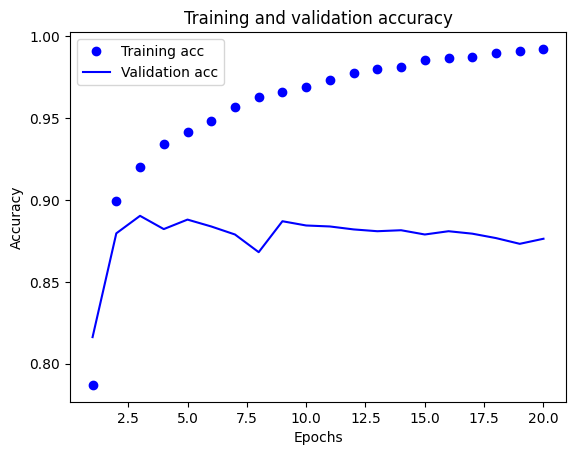

In [27]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4718 - accuracy: 0.8100
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2804 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2183 - accuracy: 0.9230
Epoch 4/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1865 - accuracy: 0.9331


In [1]:
results

NameError: ignored

### Using a trained model to generate predictions on new data

In [21]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.15474808],
       [0.9996214 ],
       [0.3663214 ],
       ...,
       [0.06572834],
       [0.04156864],
       [0.34892607]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [49]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [23]:
len(train_data)

8982

In [24]:
len(test_data)

2246

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [50]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

### Preparing the data

**Encoding the input data**

In [51]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [52]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [53]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [54]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [55]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [56]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 37ms/step - loss: 2.6824 - accuracy: 0.3934 - val_loss: 1.8170 - val_accuracy: 0.5430
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6328 - accuracy: 0.6015 - val_loss: 1.4971 - val_accuracy: 0.6490
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3385 - accuracy: 0.6913 - val_loss: 1.2822 - val_accuracy: 0.7050
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1039 - accuracy: 0.7374 - val_loss: 1.1772 - val_accuracy: 0.7230
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9342 - accuracy: 0.7771 - val_loss: 1.1221 - val_accuracy: 0.7360
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7934 - accuracy: 0.8097 - val_loss: 1.0519 - val_accuracy: 0.7700
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6606 - accuracy: 0.8460 - val_loss: 1.2184 - val_accuracy: 0.7150
Epoch 8/20
16

**Plotting the training and validation loss**

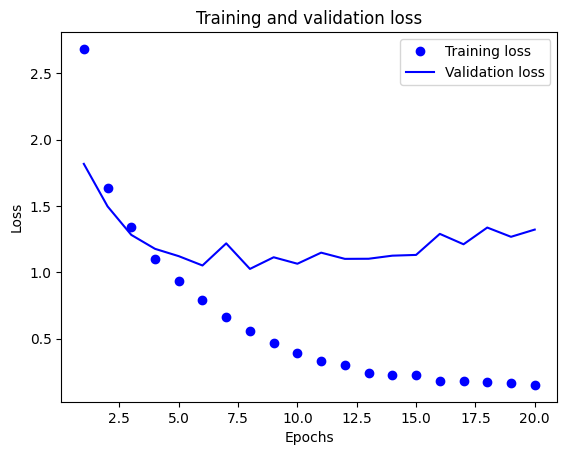

In [58]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

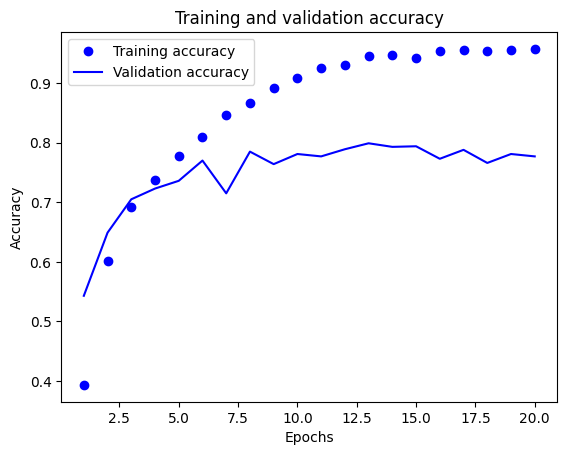

In [59]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [64]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=8,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
18/18 [==============================] - 1s 14ms/step - loss: 2.7136 - accuracy: 0.5110
Epoch 2/8
18/18 [==============================] - 0s 14ms/step - loss: 1.4720 - accuracy: 0.6858
Epoch 3/8
18/18 [==============================] - 0s 14ms/step - loss: 1.1256 - accuracy: 0.7596
Epoch 4/8
18/18 [==============================] - 0s 15ms/step - loss: 0.9131 - accuracy: 0.8069
Epoch 5/8
18/18 [==============================] - 0s 14ms/step - loss: 0.7557 - accuracy: 0.8382
Epoch 6/8
18/18 [==============================] - 0s 15ms/step - loss: 0.6279 - accuracy: 0.8646
Epoch 7/8
18/18 [==============================] - 0s 14ms/step - loss: 0.5258 - accuracy: 0.8866
Epoch 8/8
71/71 [==============================] - 0s 3ms/step - loss: 0.9239 - accuracy: 0.7890


In [65]:
results

[0.9239451885223389, 0.7889581322669983]

In [66]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19011576135351738

### Generating predictions on new data

In [30]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

1.0000001

In [33]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

In [34]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [35]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [84]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 13ms/step - loss: 2.7611 - accuracy: 0.3406 - val_loss: 1.8891 - val_accuracy: 0.5670
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.6390 - accuracy: 0.6144 - val_loss: 1.5464 - val_accuracy: 0.6060
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3365 - accuracy: 0.6478 - val_loss: 1.4214 - val_accuracy: 0.6440
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1276 - accuracy: 0.7098 - val_loss: 1.3764 - val_accuracy: 0.6790
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9650 - accuracy: 0.7481 - val_loss: 1.4358 - val_accuracy: 0.6930
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8472 - accuracy: 0.7606 - val_loss: 1.4497 - val_accuracy: 0.6960
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7489 - accuracy: 0.7859 - val_loss: 1.5584 - val_accuracy: 0.6790
Epoch 8/20
63/63 [

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [85]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [68]:
train_data.shape

(404, 13)

In [69]:
test_data.shape

(102, 13)

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [86]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [87]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [73]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [74]:
all_scores

[1.863163709640503, 2.587815284729004, 2.4135406017303467, 2.3448615074157715]

In [75]:
np.mean(all_scores)

2.3023452758789062

**Saving the validation logs at each fold**

In [76]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [77]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

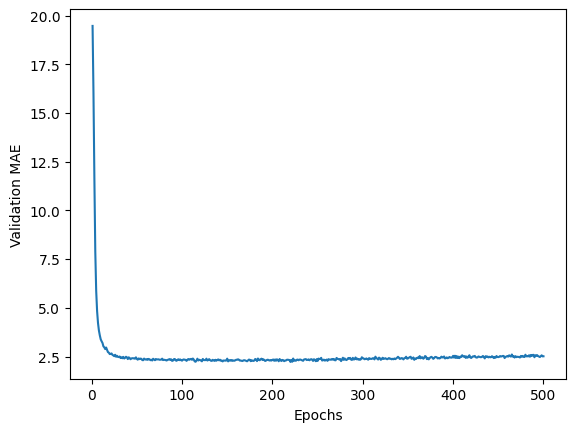

In [78]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

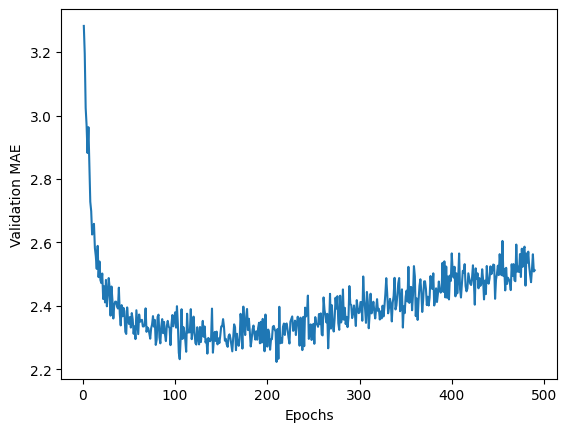

In [79]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [80]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 14.4964 - mae: 2.4595


In [81]:
test_mae_score

2.4594953060150146

### Generating predictions on new data

In [82]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 1s 3ms/step


array([8.687288], dtype=float32)

### Wrapping up

## Summary